We learned about NumPy. NumPy makes it easier to perform calculations of numerical data. On top of that, it is much faster due to its capacity of performing computation on several values at once. NumPy library makes working with data easier. Because we can easily work across multiple dimensions, our code is a lot easier to understand. By using vectorized operations instead of loops, our code runs faster with larger data.

However, NumPy comes with its limitations. When we worked with more complex data from a CSV file, we saw that it did not handle textual values very easily. Moreover, an ndarray can only hold one type of data making it hard to work with heterogeneous data. There are several things that limit its usefulness:

- The lack of support for column names forces us to frame questions as multi-dimensional array operations.
- Support for only one data type per ndarray makes it more difficult to work with data that contains both numeric and string data.
- There are lots of low level methods, but there are many common analysis patterns that don't have pre-built methods.

The pandas library provides solutions to all of these pain points and more. Pandas is not so much a replacement for NumPy as an extension of NumPy. The underlying code for pandas uses the NumPy library extensively

The primary data structure in pandas is called a **DataFrame**. Dataframes are the pandas equivalent of a Numpy 2D ndarray, with a few key differences:

Axis values can have string labels, not just numeric ones.
Dataframes can contain columns with multiple data types: including `integer`, `float`, and `string`.

We'll work with a data set from Fortune magazine's 2017 Global 500 list, which ranks the top 500 corporations worldwide by revenue. The data set was originally compiled [here](https://data.world/chasewillden/fortune-500-companies-2017); however, we modified the original data set to make it more accessible.

In [1]:
import pandas as pd

f500 = pd.read_csv("f500.csv", index_col = 0)
f500.index.name = None
print(f500.shape)
print(type(f500))
print(f500.dtypes)


(500, 16)
<class 'pandas.core.frame.DataFrame'>
rank                          int64
revenues                      int64
revenue_change              float64
profits                     float64
assets                        int64
profit_change               float64
ceo                          object
industry                     object
sector                       object
previous_rank                 int64
country                      object
hq_location                  object
website                      object
years_on_global_500_list      int64
employees                     int64
total_stockholder_equity      int64
dtype: object


Here is a data dictionary for some of the columns:

- `company`: Name of the company.
- `rank`: Global 500 rank for the company.
- `revenues`: Company's total revenue for the fiscal year, in millions of dollars (USD).
- `revenue_change`: Percentage change in revenue between the current and prior fiscal year.
- `profits`: Net income for the fiscal year, in millions of dollars (USD).
- `ceo`: Company's Chief Executive Officer.
- `industry`: Industry in which the company operates.
- `sector`: Sector in which the company operates.
- `previous_rank`: Global 500 rank for the company for the prior year.
- `country`: Country in which the company is headquartered.

In [2]:
f500.head(6) #  By default, it will return the first five rows
f500.tail(8) #  By default, it will return the last five rows

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
Telecom Italia,493,21941,-17.4,1999.4,74295,NaN,Flavio Cattaneo,Telecommunications,Telecommunications,404,Italy,"Milan, Italy",http://www.telecomitalia.com,18,61227,22366
Xiamen ITG Holding Group,494,21930,34.3,35.6,12161,-25.1,Xu Xiaoxi,Trading,Wholesalers,0,China,"Xiamen, China",http://www.itgholding.com.cn,1,18454,1066
Xinjiang Guanghui Industry Investment,495,21919,31.1,251.8,31957,49.9,Shang Jiqiang,Trading,Wholesalers,0,China,"Urumqi, China",http://www.guanghui.com,1,65616,4563
Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006
AutoNation,500,21609,3.6,430.5,10060,-2.7,Michael J. Jackson,Specialty Retailers,Retailing,0,USA,"Fort Lauderdale, FL",http://www.autonation.com,12,26000,2310


In [3]:
# Information about the types of each column.
f500.dtypes

rank                          int64
revenues                      int64
revenue_change              float64
profits                     float64
assets                        int64
profit_change               float64
ceo                          object
industry                     object
sector                       object
previous_rank                 int64
country                      object
hq_location                  object
website                      object
years_on_global_500_list      int64
employees                     int64
total_stockholder_equity      int64
dtype: object

In [4]:
# overview of all the dtypes, along with its shape and other information
f500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Walmart to AutoNation
Data columns (total 16 columns):
rank                        500 non-null int64
revenues                    500 non-null int64
revenue_change              498 non-null float64
profits                     499 non-null float64
assets                      500 non-null int64
profit_change               436 non-null float64
ceo                         500 non-null object
industry                    500 non-null object
sector                      500 non-null object
previous_rank               500 non-null int64
country                     500 non-null object
hq_location                 500 non-null object
website                     500 non-null object
years_on_global_500_list    500 non-null int64
employees                   500 non-null int64
total_stockholder_equity    500 non-null int64
dtypes: float64(3), int64(7), object(6)
memory usage: 66.4+ KB


We used the `DataFrame.info()` method to show us the number of entries in our index (representing the number of rows), a list of each column with their dtype and the number of non-null values, as well as a summary of the different dtypes and memory usage.

Because our axes in pandas have labels, we can select data using those labels — unlike in NumPy, where we needed to know the exact index location. To do this, we can use the `DataFrame.loc[]` method.

In [16]:
# Select the industry column
# industries = f500.loc[:,"industry"] # Method 1
industries = f500.industry          # Method 2
# industries = f500["industry"]        # Method 3 (most popular)
industries.head()


Walmart                        General Merchandisers
State Grid                                 Utilities
Sinopec Group                     Petroleum Refining
China National Petroleum          Petroleum Refining
Toyota Motor                Motor Vehicles and Parts
Name: industry, dtype: object

In [6]:
industries_type = type(industries)
industries_type # Series is the pandas type for one-dimensional objects

pandas.core.series.Series

Anytime we see a 1D pandas object, it will be a **series**. Anytime we see a 2D pandas object, it will be a **dataframe**.

In fact, we can think of a dataframe as a collection of series objects, which is similar to how pandas stores the data behind the scenes

In [9]:
# selection of cloumns using different method

countries = f500.country # Select the country column
revenues_years = f500[["revenues","years_on_global_500_list"]] #select the revenues and years_on_global_500_list columns.
ceo_to_sector = f500.loc[:,"ceo":"sector"] # select all columns from ceo up to and including sector

In case of selecting of slicing of columns, we can't use any method other than `.loc` method

# Select rows using the labels of the index axis

In [8]:
toyota = f500.loc["Toyota Motor"] # row with index Toyota Motor
drink_companies = f500.loc[["Anheuser-Busch InBev", "Coca-Cola","Heineken Holding"]]
middle_companies = f500["Tata Motors":"Nationwide"] # we can't use this shortcut for columns - because it's reserved for use with rows

In [9]:
middle_companies = f500.loc["Tata Motors":"Nationwide","rank":"country"]

Series and dataframes are two distinct objects, they have their own unique methods.

In [11]:
countries = f500["country"]
country_counts = countries.value_counts() # value_counts() is a series only method, we get error if we use on DataFrame.
# This method displays each unique non-null (null values are dropped (dropna = True) by default) value in a column and their counts in order.
country_counts # its an alternate of dictionary frequency

USA             132
China           109
Japan            51
Germany          29
France           29
Britain          24
South Korea      15
Netherlands      14
Switzerland      14
Canada           11
Spain             9
India             7
Brazil            7
Australia         7
Italy             7
Taiwan            6
Russia            4
Ireland           4
Sweden            3
Singapore         3
Mexico            2
Thailand          1
Luxembourg        1
Turkey            1
Finland           1
Venezuela         1
Indonesia         1
Saudi Arabia      1
Denmark           1
Belgium           1
Norway            1
U.A.E             1
Malaysia          1
Israel            1
Name: country, dtype: int64

As with dataframes, we can use `Series.loc[]` to select items from a series using single labels, a list, or a slice object. We can also omit `loc[]` and use bracket shortcuts for all three


In [13]:
india = country_counts["India"]
north_america = country_counts.loc[["USA", "Canada","Mexico"]]  # using loc is optional in Series
country_counts["USA":"Spain"]

USA            132
China          109
Japan           51
Germany         29
France          29
Britain         24
South Korea     15
Netherlands     14
Switzerland     14
Canada          11
Spain            9
Name: country, dtype: int64

In [50]:
big_movers = f500.loc[["Aviva", "HP", "JD.com","BHP Billiton"],["rank","previous_rank"]] # order of rows and columns will be maintained

In [51]:
bottom_companies = f500.loc["National Grid": "AutoNation", ["rank","sector","country"]]

Above, we set the `Company` column as the index of the `f500` dataframe. However, if this dataframe contains several company with the same name and if we try to access the `f500.loc` property using `Company` as row index, pandas will return all rows with this name.

We can delete an index by using the `DataFrame.reset_index()` method. This will restore the row that we used to create the index. By default, it will return a new dataframe without indexes. If we want to change the current one instead, we need to pass `inplace=True` to it.

When using ranges with indexes that contain non-unique values, pandas will throw an error. Therefore, we recommend only use columns with unique values as indexes.

In [1]:
# f500["Tata Motors":"Nationwide"]

In the following example, we start by removing the existing index and create a new one:

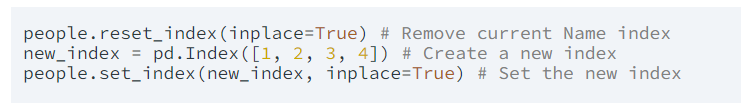

In some situations we might need to have this data in a dictionary. Fortunately the series object also has a method for this. We can use the `Series.to_dict()` method to convert a series into a dictionary

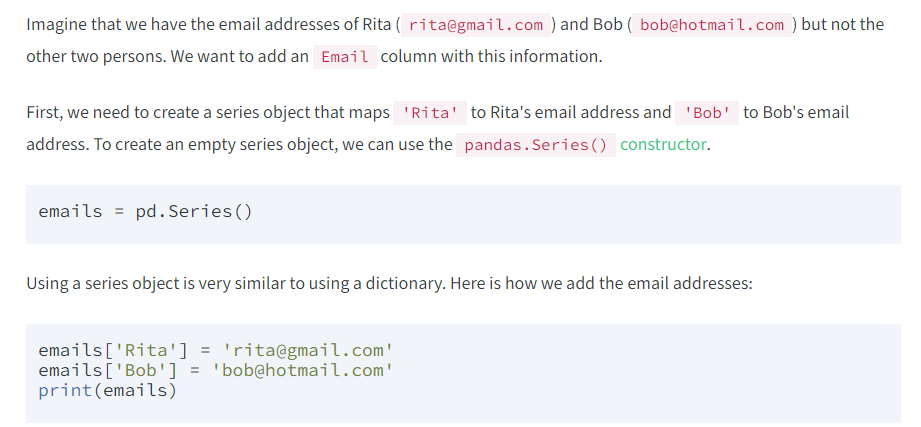